# MATH 210 Assignment 5

## Instructions

* Write your solutions in the cells with `YOUR CODE HERE`.
* You may work with others but submit your own solutions.
* Execute the test cells to verify that your solutions pass.
* **This notebook contains hidden tests!** Your solution may not be completely correct even if it passes all tests below.
* Submit this notebook to Canvas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

## Problem 1 (5 marks)

Write a function called `interpolation` which takes an input parameter `y` (a Python list or NumPy array of length $N$) and returns a NumPy array `c` of length `len(y)` consisting of the coefficients of the unique polynomial

$$
p(x) = c_0 + c_1x + c_2x^2 + \cdots + c_dx^d
$$

such that $p(n)=y_n$ for each $n=0,\dots,N-1$. Use the function `scipy.linalg.solve` to solve the corresponding linear system $A \mathbf{c} = \mathbf{y}$ arising form the interpolation equations. The function `numpy.vander` may be helpful.

In [2]:
# YOUR CODE HERE
def interpolation(y):
    y = np.array(y)
    N = len(y)
    A = np.vander(np.arange(N), increasing=True)
    c = la.solve(A, y)
    return c

Plot the data `y` and interpolant polynomial `p(x)` with coefficients `c`.

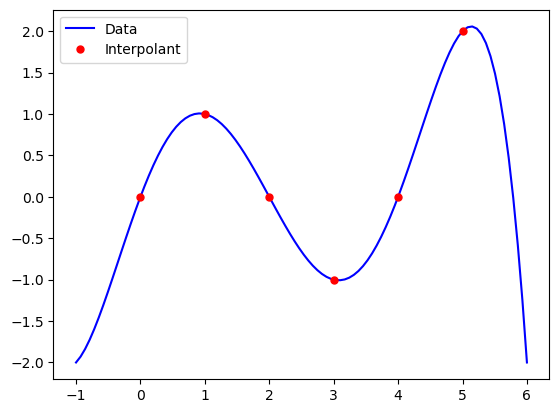

In [3]:
y = [0,1,0,-1,0,2]
c = interpolation(y)
x = np.linspace(-1,len(y),100)
p = sum([c[n]*x**n for n in range(0,len(y))])
plt.plot(x,p,'b-')
plt.plot(range(len(y)),y,'r.',ms=10)
plt.legend(['Data','Interpolant'])
plt.show()

In [4]:
# Test 1: Verify interpolation returns the correct datatype. (1 mark)
assert isinstance(interpolation([0,1,0,1]),np.ndarray)
print("Test 1: Success!")

Test 1: Success!


In [5]:
# Test 2: Verify interpolation returns an array of the correct size. (1 mark)
assert interpolation([0,1,0,1]).size == 4
print("Test 2: Success!")

Test 2: Success!


In [6]:
# Test 3: Verify interpolation returns the correct values. (1 mark)
assert np.allclose(interpolation([1,0,1]),[1,-2,1])
print("Test 3: Success!")

Test 3: Success!


In [7]:
# Test 4: Verify interpolation returns the correct values. This cell contains hidden tests. (2 marks)

## Problem 2 (4 marks)

Compute coefficients $c_0,c_1,c_2$ such that the model $f(x) = c_0e^{-x} + c_1 e^{-2x} + c_2 e^{-3x}$ best fits the data `x` and `y`. Save the coefficients as a 1-dimensional NumPy array `c`.

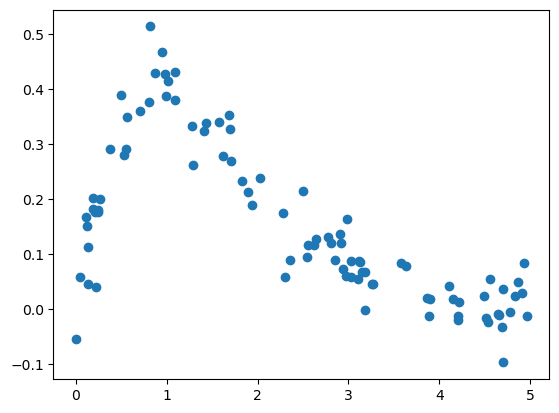

In [8]:
data = np.loadtxt('data.csv',delimiter=',')
x = data[:,0]
y = data[:,1]
plt.scatter(x,y)
plt.show()

In [9]:
# YOUR CODE HERE
N = 50
A = np.column_stack([np.exp(-x),np.exp(-2*x),np.exp(-3*x)])
c = la.solve(A.T@A,A.T@y)

In [10]:
# Test 1: Verify c is a NumPy array. (1 mark)
assert isinstance(c,np.ndarray)
print("Test 1: Success!")

Test 1: Success!


In [11]:
# Test 2: Verify c is length 3. (1 mark)
assert len(c) == 3
print("Test 2: Success!")

Test 2: Success!


In [12]:
# Test 3: Verify values of c. This cell contains hidden tests. (2 marks)

Plot the model with the data:

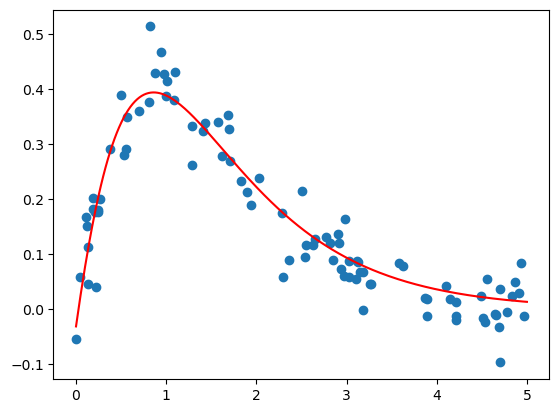

In [13]:
X = np.linspace(0,5,200)
Y = c[0]*np.exp(-X) + c[1]*np.exp(-2*X) + c[2]*np.exp(-3*X)
plt.scatter(x,y)
plt.plot(X,Y,'r')
plt.show()

## Problem 3 (6 marks)

Write a function called `cval` which takes a 2D NumPy array $A$ representing a square matrix and returns the value

$$
c = \sqrt{\frac{\lambda_{\max}}{\lambda_{\min}}}
$$

where $\lambda_{\max}$ and $\lambda_{\min}$ are the maximum and minimum eigevalues of $A^TA$. Note that the eigenvalues of $A^TA$ are real and non-negative. If $\lambda_{\min} < 10^{-14}$ (ie. $\lambda_{\min} = 0$), then return `np.inf`. If the matrix $A$ is not square, print the statement `"Matrix is not square"` and return `None`.

In [39]:
# YOUR CODE HERE
def cval(A): 
    if A.shape[0] != A.shape[1]:
        print("Matrix is not square")
        return None
    else:
        eigenvalues,eigenvectors = la.eig(A.T@A)
        eigenvalues_new = eigenvalues.real
        max_value = np.max(eigenvalues_new)
        min_value = np.min(eigenvalues_new)
        if min_value < 1e-14:
            return np.inf
        else:
            c = np.sqrt(max_value/min_value)
            return c

In [40]:
# Test 1: Check cval returns the correct datatype for square matrix. (1 mark)
A = np.random.rand(5,5)
assert isinstance(cval(A),np.float64) , "Return value should be a NumPy float."
print("Test 1: Success!")

Test 1: Success!


In [41]:
# Test 2: Check cval returns None for non-square matrix. (1 mark)
A = np.random.rand(3,5)
assert cval(A) == None , "Return value should be None when A is not square."
print("Test 2: Success!")

Matrix is not square
Test 2: Success!


In [42]:
# Test 3: Check cval returns inf when \lambda_{min} == 0. (1 mark)
A1 = np.ones((4,4))
assert cval(A1) == np.inf , "Return value should be inf when det(A) = 0."
print("Test 3: Success!")

Test 3: Success!


In [43]:
# Test 4: Check cval returns correct values. (1 mark)
epsilon = 1e-8
A1 = np.eye(5)
assert np.abs(cval(A1) - 1.0) < epsilon , "Return value should be 1.0 for the identity matrix."
A2 = np.diag(np.arange(1,9))
assert np.abs(cval(A2) - 8.0) < epsilon , "Return value should be 8.0 for the diagonal matrix with entries [1,2,3,4,5,6,7,8]."
print("Test 4: Success!")

Test 4: Success!


In [44]:
# Test 5: Check cval returns correct values. This cell contains hidden tests. (2 marks)